In [1]:
# RUN/EXCEUTE THE ENTIRE CELL

# INSTALL LIBRARIES
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib#### Import Python Libraries


# IMPORT LIBRARIES
# Importing some common libraries that’s needed for all data science related projects
import numpy as np
import pandas as pd
import math
import scipy


# Importing different modules from the sklearn library to build and evaluate the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Importing matplotlib and seaborn libraries for data visualisation 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Switching off unnecessary warning messages 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r'C:\Users\Don.Rombaoa\Downloads\Python - Don\Titanic\Titanic Train.xlsx')

In [4]:
df.head()

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


In [5]:
#CHECK FOR MISSING DATA AND DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   890 non-null    int64  
 1   Name                     890 non-null    object 
 2   Sex                      890 non-null    object 
 3   Age                      890 non-null    float64
 4   Siblings/Spouses Aboard  890 non-null    int64  
 5   Parents/Children Aboard  890 non-null    int64  
 6   Fare                     889 non-null    float64
 7   Survived                 890 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.shape

(890, 8)

In [7]:
df.describe(include='all')

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
count,890.000000,890,890,890.000000,890.000000,890.000000,889.000000,890.000000
unique,NaN,888,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Mr. Patrick Dooley,male,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,576,NaN,NaN,NaN,NaN,NaN
mean,2.305618,NaN,NaN,29.612551,0.523596,0.382022,32.250177,0.385393
std,0.837044,NaN,NaN,14.665972,1.103224,0.806409,49.739571,0.486962
min,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,20.625000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,1.000000


In [4]:
# CHECK FOR DUPES
df.duplicated()
df.loc[df.duplicated()]


,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
887,3,Mr. Patrick Dooley,male,32.0,0,0,7.75,0
888,3,Mr. Patrick Dooley,male,32.0,0,0,7.75,0


In [ ]:
# DROP DUPES
df.drop_duplicates()

In [10]:
# CHECK FOR MISSING DATA
df.loc[df.Fare.isnull()]

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
889,1,Mr. Don Rombaoa,male,150.0,0,0,NaN,1


In [13]:
# INTERPOLATE MISSING DATA
df.Fare.fillna(method = 'ffill', inplace = True)

In [22]:
# CHANGE OUR MIND - WANT TO MAKE THAT NA FARE = 0
# USE THE INDEX AND THE COLUMN TO IDENTIFY WHAT NEEDS TO BE CHANGED
#dataframe.loc[row index,['column-names']] = value

df.loc[889,['Fare']] = 0

In [40]:
# CHANGE MY MIND AGAIN - I NOW WANT THE AVERAGE
#year_2018 = df.loc[2018,:].mean()
#df.loc[889,['Fare']] = 
avgmalefirstclassfare = df.loc[(df.Pclass==1) & (df.Sex=='male'),['Fare']].mean()
avgmalefirstclassfare

Fare    66.679573
dtype: float64

<AxesSubplot:ylabel='Age'>

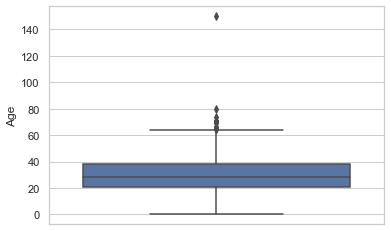

In [13]:
# OUTLIERS - BOXPLOT(AGE)

sns.boxplot(y='Age', data=df)

<AxesSubplot:ylabel='Fare'>

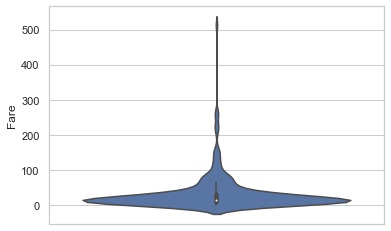

In [14]:
# OUTLIERS - VIOLIN(FARE)
sns.violinplot(y ='Fare', data = df)

In [50]:
# VIA PIVOT TABLE - TO CHECK IF AVG FARE FOR MALES AND FIRST CLASS IS TRUE FROM ABOVE
#pd.pivot_table(df1, values='lifeExp',
#                     index=['year'],
#                     columns='continent',
#                     aggfunc=[min,max])

# NOTE AUTOMATIC AGGREGATION IS MEAN
pd.pivot_table(df, 
               values = 'Fare',
               index = 'Sex', # rows displayed
               columns = 'Pclass') # columns displayed

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,66.679573,19.741782,12.666797


In [51]:
# PIVOT TABLE - USING MANY AGGREGATIONS
pd.pivot_table(df, 
               values = 'Fare',
               index = 'Sex', # rows displayed
               #columns = 'Pclass',
               aggfunc = ['mean','min', 'max', 'count' ]) # columns displayed

,mean,min,max,count
,Fare,Fare,Fare,Fare
Sex,,,,
male,66.679573,0.0,512.3292,123


In [52]:
#PIVOT TABLE - FILTER FOR FIRST CLASS AND MALES ONLY
pd.pivot_table(df.loc[(df.Pclass==1) & (df.Sex=='male')], 
               values = 'Fare',
               index = 'Sex') # columns displayed

,Fare
Sex,
male,66.679573
